# Income Classification - Akhil Kunam, Sebastian Poellinger, Yuri Han
### Project Topic
Our project's goal is to classify individual income as above 50k per year or less than 50k per year based on various attirbutes. There are 14 features such as age, workclass, education, and race. We will use these features to classify each individual into their income group. We chose this topic as it is a way to allow us to determine if certain factors cause people to earn more than others and possibly explain some income inequality. Another reason was that this data is easily classifiable so it can help us master some classifcation models.


### Data
Data Source Link: http://archive.ics.uci.edu/ml/datasets/Adult
We got our data from UCI. UCI has a "Center for Machine Learning and Intelligent Systems" which provides the public around 500 data sets. It is based off of census data  from 1994 and has 48,842 samples split into 32,561 data points for training and 16281 data points for testing. Each data point has its relevant 14 features as well as its classification as "<=50k" or ">50k". The 14 features break down as 6 numeric and 8 categorical. Below is a breakdown for each feature 

Age: Numerical value representing age of the individual 

Workclass: Categorical value representing if the individual is self employed, working for government, private, etc. There are 8 values for this field. 

Fnlwgt: This is a numerical value that tells us how many people this sample represents as believed by the census. 

Education: Categorical value representing the highest level of education for the individual. There are 16 values for this.  

Education-num: Numerical value that represents the highest level of education as the corresponding grade number. 

Marital-status: Categorical variable with 7 values representing the status of the individuals marriage. 

Occupation: Categorical variable with 14 values representing the type of work the individual does. 

Relationship: Categorical variable with 6 values representing the individuals relationship status. 

Race: Categorical value with 5 values showing the race of the individual. 

Sex: Categorical value representing the gender of the person. 

Capital-gain: Numerical value representing how much the individual gained when selling investments. 

Capital-loss: Numerical value representing how much the individual lost when selling investments. 

Hours-per-week: Numerical value representing how many hours the individual works per week. 

Native-country: Categorical variable with 41 values representing the individuals native country. 


### Data Cleaning

For our data cleaning we first started off by finding which columns had '?' as a value. When we were doing a rough skim over the csv files we saw that all the unknown values were represented as '?' so we wanted to know in which columns those were found and how we can go about fixing them. We learned that they were in the workclass, occupation, and native-country columns. For the workclass and native country features we saw that the most common feature was found way more than the second most common so we decided to impute the '?' values as the most common value for the feature since it was likely it would be that value. For occupation the counts for each value were around the same so we couldn't impute them and decided to leave those values as is. We did dropna to make sure we didn't have any samples with a NaN value for any of their features. 

Next we wanted to convert the income classification from a string to a numeric value that would be easily used for our models. We did this through the map function for the dataframe. We also learned that the 'fnlwgt' feature was mainly only important for the people reading the census and had no effect on the income so we decided it would be best to drop that feature. 

We printed out the values for all the features we had left and saw that the education and education-num features were the exact same since education-num was the numerical representation of the value in the education feature. We decided that we can drop education as we have all that information already in the education-num column. 

We also did data type munging since we had several categorical features and wanted to convert them to numeric so that our models would be able to use them. We used sklearn's LabelEncoder to do this for us. It would take the values and change them to a number. 

Furthermore a PCA was done in order to decrease the complexity of the data set, as we suspected there were features, which did not add much value. One example is the marital status and the relationship column. They seem to overlap if you look at what they are trying to say.

We also learned that our data set is slightly imbalanced. About 75% of our samples result as <=50k and only around 25% come to be >50k. We will keep this in mind when scoring our models as if our model has a high accuracy it could just be declaring most samples as <=50k so we need to look at the recall and precision to make sure that our accuracy is meaningful.

Overall we learned that our data was relatively clean, but could have some features dropped and some values imputed so that it would be better optimized for our models.

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv("./data/adult.data", names=names, skipinitialspace=True)
df_test = pd.read_csv("./data/adult.test", names=names, skipinitialspace=True)

In [3]:
#Count all the ? entries for each featuree
for column in df.columns:
    print(column + ": {}".format((df[column] == '?').sum()))

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583
income: 0


/Users/akhilkunam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
df["workclass"] = df["workclass"].replace('?', 'Private')
df["native-country"] = df["native-country"].replace('?', 'United-States')

df_test["workclass"] = df_test["workclass"].replace('?', 'Private')
df_test["native-country"] = df_test["native-country"].replace('?', 'United-States')

df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [5]:
#make the income numerical
# print((df["income"] == ' <=50K').sum())
df["income"] = df["income"].map({"<=50K":0, ">50K":1})
df_test["income"] = df_test["income"].map({"<=50K.":0, ">50K.":1})
#drop fnlweight as it is only interesting for the census authorities
df = df.drop(labels="fnlwgt", axis=1)
df_test = df_test.drop(labels="fnlwgt", axis=1)




In [6]:
for column in df.columns:
    print(df[column].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64
Married-

The cells education and education-num are equal, which means we can drop the non numerical education column.

In [7]:
df = df.drop(labels="education", axis=1)
df_test = df_test.drop(labels="education", axis=1)

In [8]:
train_x = df.drop(labels="income", axis=1)
train_y = df["income"]
test_x = df_test.drop(labels="income", axis=1)
test_y = df_test["income"]

In [9]:
#convert the categorical data to numerical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
features_to_encode = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in features_to_encode:
    train_x[feature] = le.fit_transform(train_x[feature])
    test_x[feature] = le.fit_transform(test_x[feature])

train_x.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,13,4,1,1,4,1,2174,0,40,38
1,50,5,13,2,4,0,4,1,0,0,13,38
2,38,3,9,0,6,1,4,1,0,0,40,38
3,53,3,7,2,6,0,2,1,0,0,40,38
4,28,3,13,2,10,5,2,0,0,0,40,4


In [10]:
#perform pca to see if we can drop even more columns which might be correlated. 
#martial status and relationship seem pretty similar to begin with
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#use labelencoder to encode the string labels to int


#scales the data to the standard normal, as is required for pca of sklearn
scaler = StandardScaler()
scaler.fit(train_x)
train_x_norm = scaler.transform(train_x)
test_x_norm = scaler.transform(test_x)

pca = PCA(0.90)
pca.fit(train_x_norm)

train_x_pca = pca.transform(train_x_norm)
test_x_pca = pca.transform(test_x_norm)
print(train_x_pca.shape)

(32561, 10)


After our initial cleaning we reduced our features to 10 while still accounting for 90% of the variance.

### EDA

We want to do some EDA before creating our models so that we can get some understanding of what our data looks like and how we should focus our models. We can find outliers or surprising information as well as maybe see if some features aren't important or shouldn't be included. 

For the EDA we started with plotting all of the features with their frequency. There seem to be some features, that are very biased to one value. These features are country, capital-loss, capital-gain and we assume they might not add any value to our classifier. For age we see that we have majority of our samples between 17 and 55 years old while very few are above 55. We also see that majority of our samples work in the private industry, this could maybe cause some imbalance as people in the other classes do not have many samples to work off of. For education we see most people only completed some high school or some college. For marital status we see that there are mainly 3 categories that are seen often, the others do not have many samples. In occupation we see that it is very evenly spread out, only a few categories have a significantly lower amount of samples. This is probably a good feature to use for us. For relationship we learned from the graph that husbands are the most frequent and the rest are lower. We learned that for race White is significantly larger than any other race. There are a bit more males than females in our samples which makes sense as husbands was also high. Native country seems to have a ton of categories, but majority of the samples fall under the US. We see for hours worked per week that the peak is at 40 which is what we expected as the typical work week is 40 hours. 

We also created a heatmap of the correlation of all the features. The result supports our initial claim, that relationship and marital-status are dependent on each other, as they show positive correlation. Another ineresting find is the negative relation between sex and relationship.

With the results from the EDA we can conclude that some of our features don´t add value to our model, as their results tend to be mostly centered at one value. As another finding we can conclude that either marital-status and relationship are redundand, as they are highly similar. Since we found out that some features are heavily biased to one value or a couple values we will make sure to test our models with a confusion matrix so we know that we aren't just going off raw accuracy. 

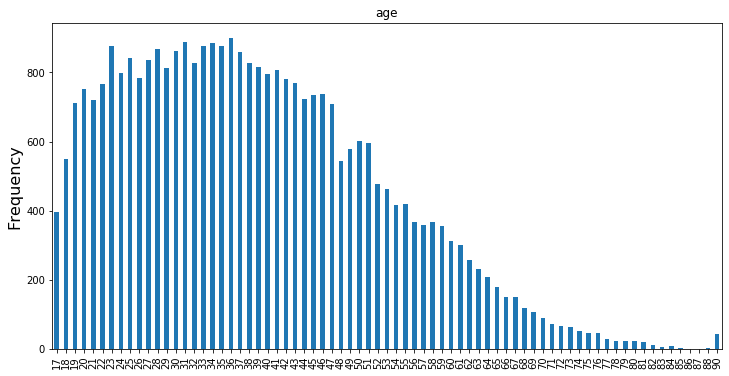

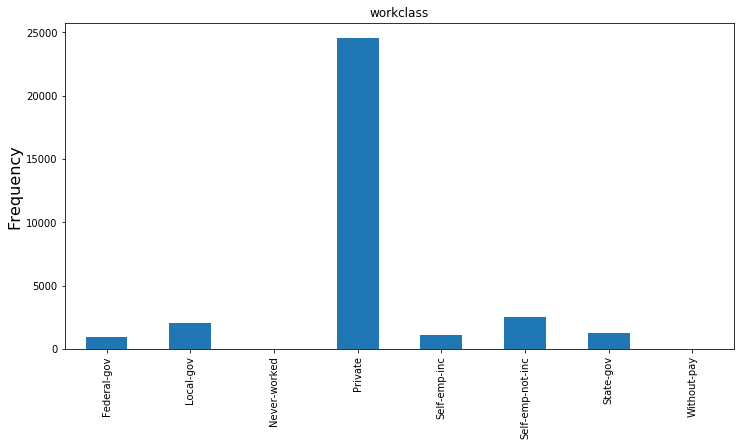

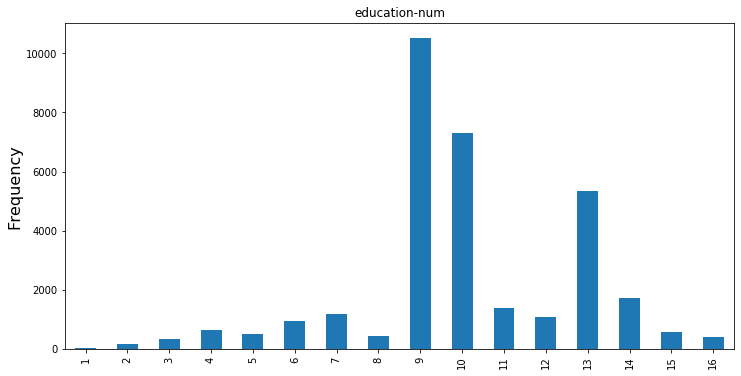

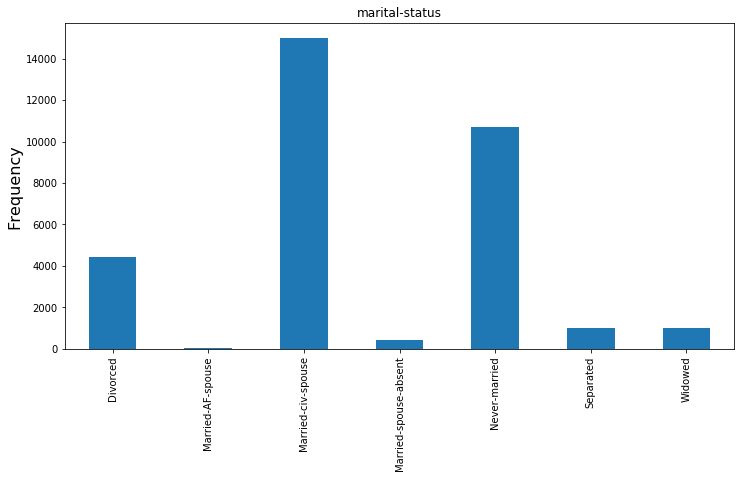

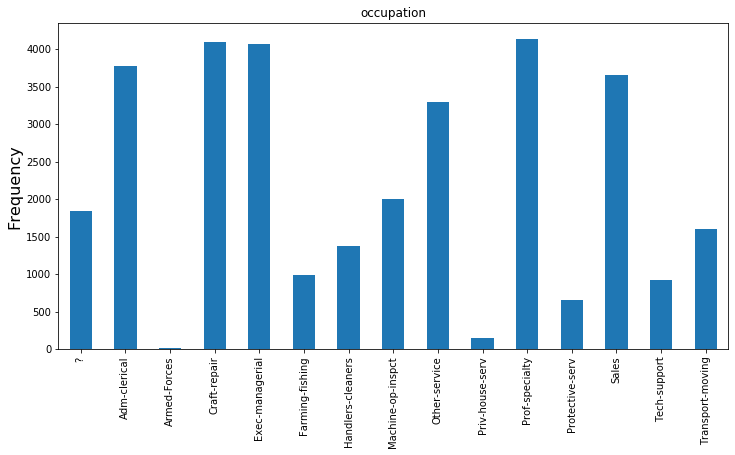

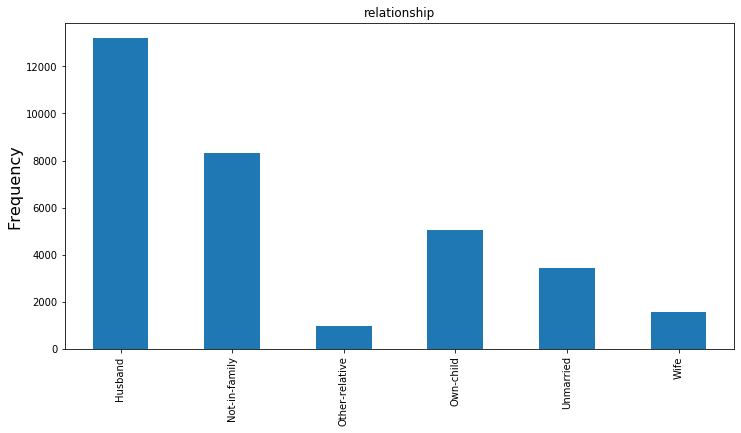

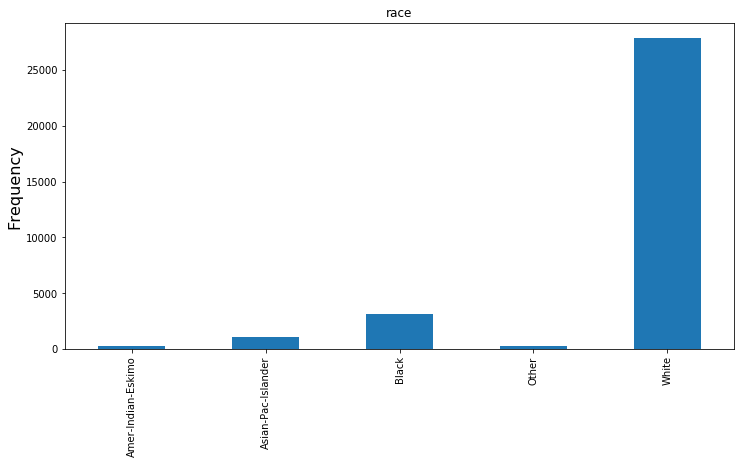

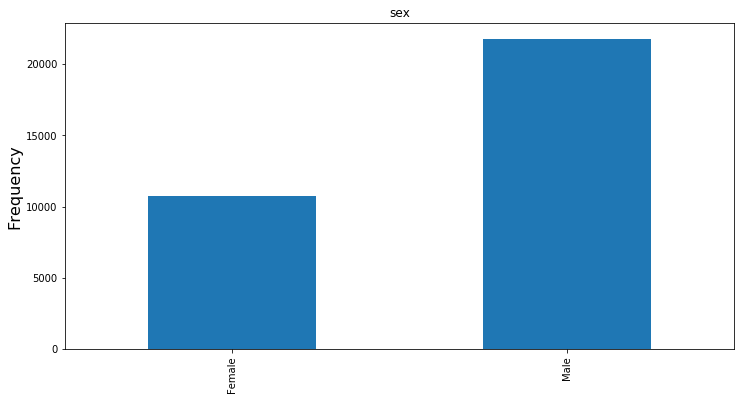

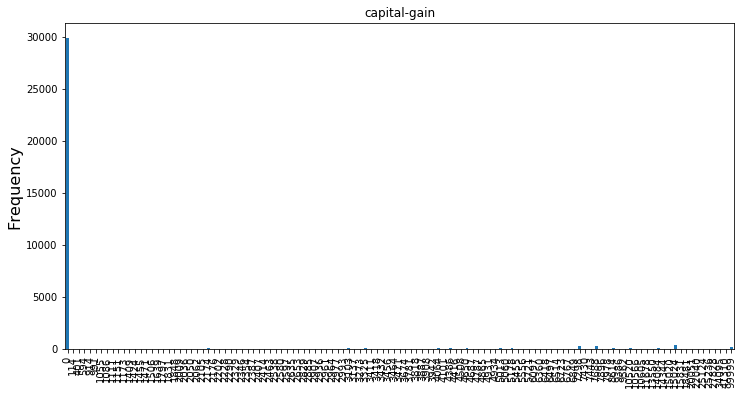

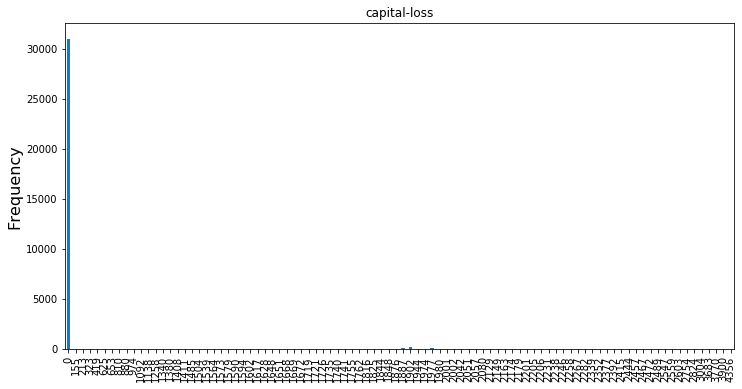

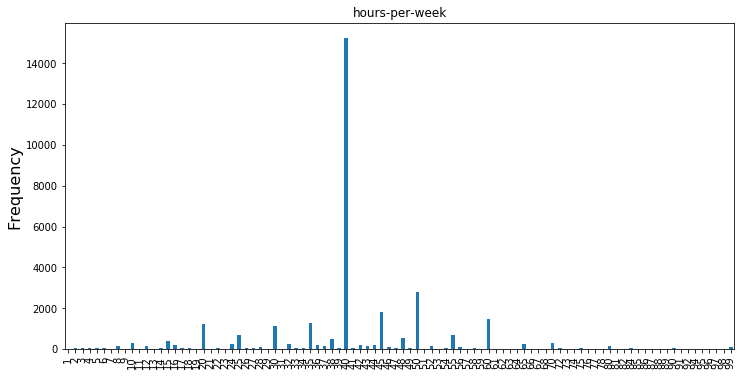

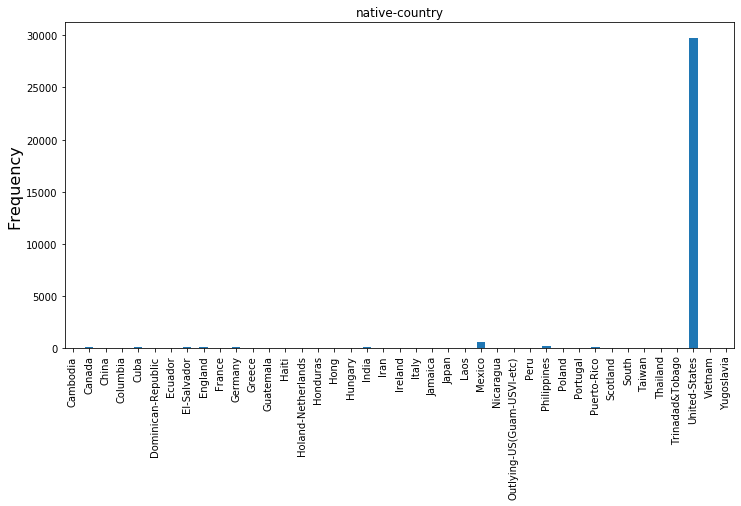

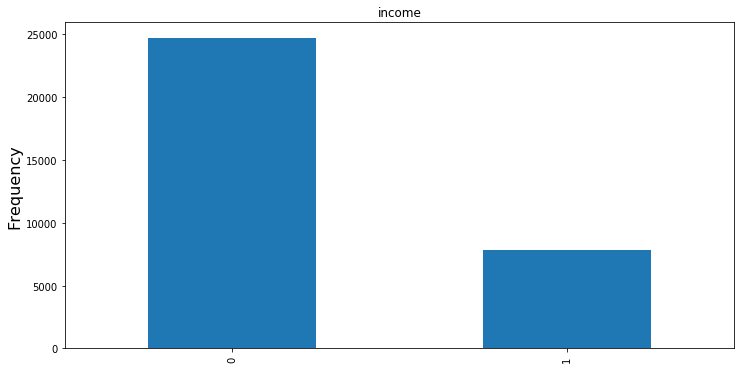

In [11]:
 #visualization of each column in frequency
for column in df.columns:
    values = df[column].value_counts().sort_index()
    categories = df[column].unique()
    ax = values.plot.bar(title=column, figsize=(12,6))
    ax.set_ylabel("Frequency", fontsize=16)
    plt.show()

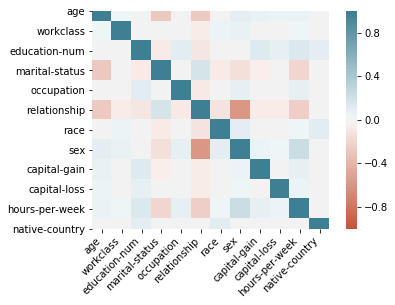

In [12]:
corr = train_x.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Models

Our initial hypothesis was to use a Random Forest. This was because the data is very suitable for binary classification since some features like occupation will have most people in the same occupation earning the same. A decision tree would be good, but by ensembling them together into a random forest we expect to get even better results and we cannot really overfit. Also since we did the correlation matrix we learned that we already dropped the features with colinearity so there shouldn't be much of a problem for any models we decide to use. 

When we initially tried a standard random forest we got a decent accuracy, but we also wanted to try and optimize it so we could increase the accuracy. We then tried to tune our hyper parameters using RandomizedSearchCV. This uses a random combination of the specified hyper parameters and tests how well the model performs while also using cross-validation. When we did this a few times we learned that out params were centering around a certain value so we tried doing it again with a smaller range to see if we can get an even more optimized set of hyper-params. We tried to 

After that we decided to test our hypothesis by trying out a variety of different models to see if Random Forest was the best. We conducted a broad approach of model building a then tried to optimize the model, that yielded the best results in the beginning. We tried adaboost which is another ensemble method and this provided good results as it was a bit better than our random forest model. We also SVC and Bagging which are other classification techniques and bagging provided decent results but SVC did poor. We searched online for other models good for classification and found GradientBoostingClassifer which we didn't learn in class so we wanted to try it out and see if it would do well. It ended up doing the best out of all our models. 

In [13]:
from sklearn import metrics
results = []
f1 = []
results_clf_name = []

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_estimators = 100, n_jobs = -1, )
model.fit(train_x, train_y)

results.append(model.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, model.predict(test_x)))
results_clf_name.append("basic random forest")

In [15]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50] #This should always be best at higher numbers. Using low number so we can test many of the other hyperparams

# criterion = ['gini', 'entropy']
# max_depth = [None, 10, 25, 50]
# min_samples_split = [2, 5, 10, 25]
# min_samples_leaf = [1, 2, 5, 10, 25]
# min_weight_fraction_leaf = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
# max_features = ['auto', 'sqrt', 'log2', None]
# max_leaf_nodes = [None, 1, 2, 5, 10, 25]
# min_impurity_decrease = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
# # min_impurity_split = [] Deprecated 
# bootstrap = [True, False]
# oob_score = [True, False]
# class_weight = [None, 'balanced', 'balanced_subsample']
# ccp_alpha = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
# max_samples = [None, 0.1, 0.25, 0.5, 0.75, 0.9]

# After a few runs we narrowed down the hyper params
criterion = ['gini', 'entropy']
max_depth = [None, 1, 2, 5, 10, 25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10]
min_weight_fraction_leaf = [0, 0.1, 0.05]
max_features = ['auto']
max_leaf_nodes = [None, 1, 2, 5, 10, 25]
min_impurity_decrease = [0, 0.05, 0.1]
# min_impurity_split = [] Deprecated 
bootstrap = [True, False]
oob_score = [False]
class_weight = [None, 'balanced', 'balanced_subsample']
ccp_alpha = [0, 0.1, 0.05]
max_samples = [None, 0.1, 0.25, 0.5, 0.75, 0.9]

hyperparams = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'max_features': max_features,
    'max_leaf_nodes': max_leaf_nodes,
    'min_impurity_decrease': min_impurity_decrease,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
    'class_weight': class_weight,
    'ccp_alpha': ccp_alpha,
    'max_samples': max_samples
}

base_model = RandomForestClassifier()
optimal_model = RandomizedSearchCV(estimator = base_model, param_distributions = hyperparams, n_iter = 1000, cv = 2, verbose=3, random_state=0, n_jobs = -1)
optimal_model.fit(train_x, train_y)
print(optimal_model.best_params_)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.1min finished


{'oob_score': False, 'n_estimators': 50, 'min_weight_fraction_leaf': 0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'max_samples': 0.5, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0, 'bootstrap': False}


In [16]:
opt_model = RandomForestClassifier(**optimal_model.best_params_)
opt_model.set_params(n_estimators=500)
opt_model.fit(train_x, train_y)

results.append(opt_model.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, opt_model.predict(test_x)))
results_clf_name.append("random forest with cv settings")

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=80, random_state=0)
ada.fit(train_x, train_y)

results.append(ada.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, ada.predict(test_x)))
results_clf_name.append("ada boost")

In [18]:
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators = 250, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto', max_depth = 20, bootstrap = False, n_jobs=-1), n_estimators=4, random_state=0, learning_rate=1)
ada_rf.fit(train_x, train_y)

results.append(ada_rf.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, ada_rf.predict(test_x)))
results_clf_name.append("ada boost strong learner")

In [19]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_x, train_y)

results.append(svm.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, svm.predict(test_x)))
results_clf_name.append("svm")

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(loss="exponential", learning_rate=.2, subsample=1, n_estimators=200)
GBC.fit(train_x, train_y)

results.append(GBC.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, GBC.predict(test_x)))
results_clf_name.append("gradient boosting classifier")

In [21]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100, n_jobs=-1, max_samples=0.20, max_features=0.65, oob_score=True)
bag.fit(train_x, train_y)

results.append(bag.score(test_x, test_y))
f1.append(metrics.f1_score(test_y, bag.predict(test_x)))
results_clf_name.append("bagging classifier")

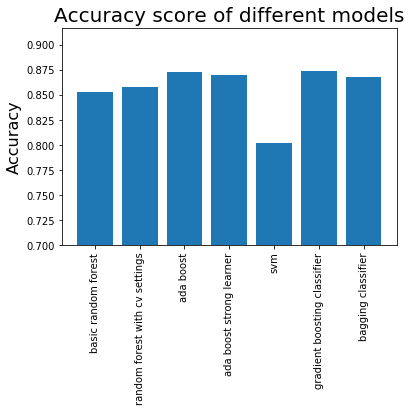

In [22]:
plt.bar(results_clf_name, results)
axes = plt.gca()
axes.set_ylim([0.7,None])
axes.set_title("Accuracy score of different models", fontsize=20)
axes.set_ylabel("Accuracy", fontsize=16)
plt.xticks(rotation=90)
plt.show()

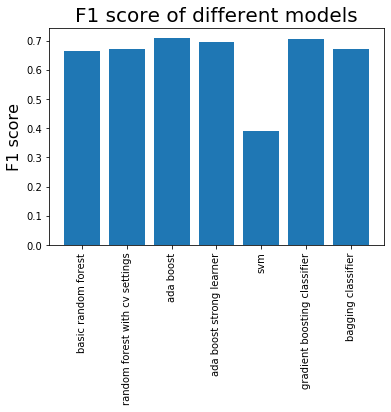

In [23]:
plt.bar(results_clf_name, f1)
axes = plt.gca()
axes.set_title("F1 score of different models", fontsize=20)
axes.set_ylabel("F1 score", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [24]:
def test_depth(range_steps, random_state=0):
    scores = []
    for step in range_steps:
        clf = RandomForestClassifier(step, random_state=random_state)
        clf.fit(train_x, train_y)
        scores.append(clf.score(test_x, test_y))
    return scores

range_steps_depth = np.arange(1, 100, 1)
scores_depth = test_depth(range_steps_depth)

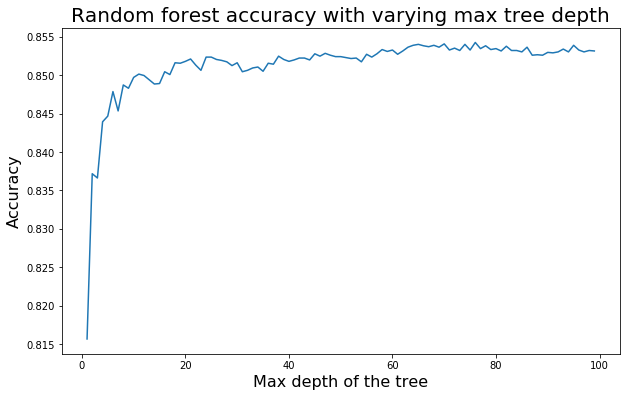

In [25]:
fig, ax = fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(range_steps_depth, scores_depth)
ax.set_title("Random forest accuracy with varying max tree depth", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=16)
ax.set_xlabel("Max depth of the tree", fontsize=16)
plt.show()

In [26]:
def test_min_sample_split(range_steps, random_state=0):
    scores = []
    for step in range_steps:
        clf = RandomForestClassifier(50,min_samples_split=step, random_state=random_state)
        clf.fit(train_x, train_y)
        scores.append(clf.score(test_x, test_y))
    return scores

range_steps_split = np.arange(2, 50, 1)
scores_split = test_min_sample_split(range_steps_split)

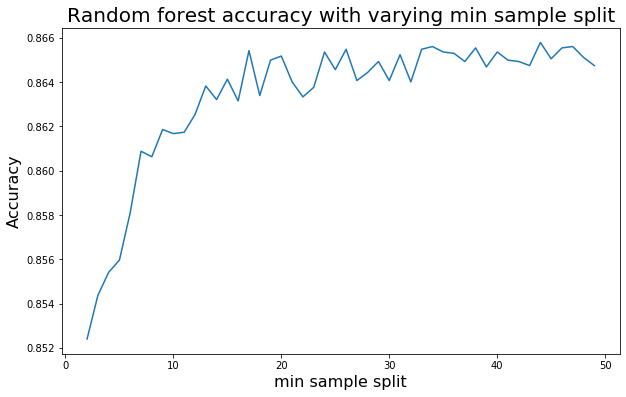

In [27]:
fig, ax = fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(range_steps_split, scores_split)
ax.set_title("Random forest accuracy with varying min sample split", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=16)
ax.set_xlabel("min sample split", fontsize=16)
plt.show()

In [28]:
metrics.confusion_matrix(test_y, GBC.predict(test_x))

array([[11747,   688],
       [ 1371,  2475]])

### Results and Analysis



Testing confusion_matrixrent classifier models, we found out most of the models were in the range of 0.85-0.875 excluding svm result according to the accuracy score. Out of all, the gradient boost classifier had the best accuracy score by 0.8735 which is about 0.5 percentile higher than other scores. We iterated over each model a few times so that we could tune our hyperparameters. This was done through educated guessing for some models as well as using RandomizedSearchCV to get many different combinations along with using cross-validation to get the best set of hyperparameters for our models. Since we already used PCA we didn’t really need to select certain features as we already reduced the dimensionality of the data while keeping a lot of the variance. 

This tells that more than comparing models, the EDA is the part where we made our accuracy of the result to increase. Such as eliminating the certain features that are unnecessary or redundant. Thus, we were able to filter out the features that directly determines the data that are mentioned in the Data part at the beginning of the report. 

As mentioned previously, since there is an imbalance in the data, we needed a different evaluation of metric such as f1. The f1 score would help us account for the false positives and false negatives which is a problem with imbalanced data while accuracy could be slightly misleading as it doesn’t take into account certain aspects which are important in scoring imbalanced data. The 1 score is significantly lower than the accuracy which means that our models are not as good with the false positive and false negative rate. The difference between models is minimal so that means it is most likely something we need to fix in our data processing such as oversampling or undersampling.


### Conclusion

For our project we learned a lot about data cleaning, eda, and also how to choose the correct model. In our data cleaning process, we looked at each feature and if it was highly correlated with another feature since some features were highly skewed, redundant, insignificant. For instance, invalid values such as '?' and 'NaN' we decided to eliminate for the accuracy of the data. If we found those we tried to impute the value as a lot of the features had some value be overwhelmingly used so we had confidence that value would be the same for the unknown values. During the EDA we delved deeper into our data to understand it more and decide how to approach our models. When graphing each feature we learned that a lot of values for certain features were very low which could pose a problem. We also learned that our data was slightly imbalanced as only 25% of the samples were classified as '>50k' so this could cause problems when we choose our scoring metric. We took our observations to build our models and started off with random forests. When we tried this we got decent accuracy, but wanted to make sure that random forest was the best model so we tried several other models. Some models like Adaboost worked better even when we used a strong learner as the base and others like SVC did significantly worse and took much more time. We finally ended up with Gradient Boosting Classifier which was marginally better than the Random Forest. 

One thing that didn't really work for us was working with slightly imbalanced data. As we can see from our f1 scores and confusion matrix we seem to get a lot more classifications as false negatives rather than false positives. It seems to be around double which hurts how good our model is. We could solve this issue by oversampling the samples with '>50k' or undersampling the samples with '<=50k' so that we reduce the data imbalance and we should get a model that has a higher f1 score which is better. 

We learned that data cleaning and EDA are important processes in machine learning since the modeling depends on the data. Without understanding your data and removing certain problems from it the accuracy or how good the model is can not be great. Also the hyper-parameter tuning is very important, by choosing incorrect hyperparameters the score for each model can be hurt a lot. Thus, with clean data, it is able to have a model that is accurate no matter what type we try for. 
